In [1]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the csv files into pandas as dataframes
data_file = "data/city_data.csv"
city_df = pd.read_csv(data_file)
data_file2 = "data/ride_data.csv"
ride_df = pd.read_csv(data_file2)
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Merge dataframes then sort by city
merge_df = pd.merge(city_df,ride_df,on="city",how="outer")
merge_df = merge_df.sort_values("city")
merge_df.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


In [5]:
# Slice the city_df by Urban city type
city_urban = city_df.loc[city_df["type"]=="Urban"]
city_urban.sort_values("city")
# Driver_count per city for urban city type
drivers_urban = city_urban["driver_count"].tolist()
drivers_urban = [each*5 for each in drivers_urban]
city_urban.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
# Slice the city_df by Rural city type
city_rural = city_df.loc[city_df["type"]=="Rural"]
city_rural.sort_values("city")
# Driver_count per city by Rural type
drivers_rural = city_rural["driver_count"].tolist()
drivers_rural = [each*5 for each in drivers_rural]
drivers_rural
city_rural.head()

,city,driver_count,type
102,South Jennifer,7,Rural
103,West Heather,4,Rural
104,Newtonview,1,Rural
105,North Holly,8,Rural
106,Michaelberg,6,Rural


In [7]:
# Slice the city_df by suburban city type
city_sub = city_df.loc[city_df["type"]=="Suburban"]
city_sub.sort_values("city")
# Driver_count per city by suburban type
drivers_sub= city_sub["driver_count"].tolist()
drivers_sub = [each*5 for each in drivers_sub]
city_sub.head()

,city,driver_count,type
66,Port Shane,7,Suburban
67,Lake Ann,3,Suburban
68,Lake Scott,23,Suburban
69,Colemanland,23,Suburban
70,New Raymond,17,Suburban


In [8]:
# Slice merged df by urban type
urban_df = merge_df.loc[merge_df["type"]=="Urban"]
urban_df.sort_values("city")
# Groupby city
group_urban = urban_df.groupby("city")
# Number of rides per city-Urban
rides_city_urban = group_urban["type"].count()
rides_city_urban
# Average fare per city-Urban
avgfare_urban = round(group_urban["fare"].mean(),2)
avgfare_urban

city
Amandaburgh             24.64
Barajasview             25.33
Carriemouth             28.31
Christopherfurt         24.50
Deanville               25.84
East Kaylahaven         23.76
Erikaland               24.91
Grahamburgh             25.22
Huntermouth             28.99
Hurleymouth             25.89
Jerryton                25.65
Johnton                 26.79
Joneschester            22.29
Justinberg              23.69
Karenberg               26.34
Karenside               27.45
Lake Danielberg         24.84
Lake Jonathanshire      23.43
Lake Scottton           23.81
Leahton                 21.24
Liumouth                26.15
Loganberg               25.29
Martinezhaven           22.65
New Jacobville          26.77
New Kimberlyborough     22.59
New Paulton             27.82
New Paulville           21.68
North Barbara           23.49
North Jasmine           25.21
North Jason             22.74
                        ...  
Port Johnbury           23.01
Port Samanthamouth      25.64
Raymo

In [9]:
# Slice merged df by rural type
rural_df = merge_df.loc[merge_df["type"]=="Rural"]
rural_df.sort_values("city")
# Groupby city
group_rural = rural_df.groupby("city")
# Number of rides per city-Rural
rides_city_rural = group_rural["type"].count()
rides_city_rural
# Average fare per city-Rural
avgfare_rural = round(group_rural["fare"].mean(),2)
avgfare_rural

city
Bradshawfurt         40.06
Garzaport            24.12
Harringtonfort       33.47
Jessicaport          36.01
Lake Jamie           34.36
Lake Latoyabury      26.06
Michaelberg          35.00
New Ryantown         43.28
Newtonview           36.75
North Holly          29.13
North Jaime          30.80
Penaborough          35.25
Randallchester       29.74
South Jennifer       35.26
South Marychester    41.87
South Saramouth      36.16
Taylorhaven          42.26
West Heather         33.89
Name: fare, dtype: float64

In [10]:
# Slice merged df by Suburban type
sub_df = merge_df.loc[merge_df["type"]=="Suburban"]
sub_df.sort_values("city")
# Groupby city
group_sub = sub_df.groupby("city")
# Number of rides per city-Suburban
rides_city_sub = group_sub["type"].count()
rides_city_sub
# Average fare per city-Suburban
avgfare_sub = round(group_sub["fare"].mean(),2)
avgfare_sub

city
Barronchester         36.42
Bethanyland           32.96
Brandonfort           35.44
Colemanland           30.89
Davidfurt             32.00
East Aaronbury        25.66
East Danielview       31.56
East Kentstad         29.82
East Marymouth        30.84
Grayville             27.76
Josephside            32.86
Lake Ann              30.89
Lake Omar             28.07
Lake Robertside       31.26
Lake Scott            31.89
Lewishaven            25.24
Lewisland             34.61
Mezachester           30.76
Myersshire            30.20
New Olivia            34.05
New Raymond           27.96
New Shannonberg       28.38
Nicolechester         30.91
North Jeffrey         29.24
North Richardhaven    24.70
North Timothy         31.26
Port Shane            31.08
Rodriguezview         30.75
Sotoville             31.98
South Brenda          33.96
South Teresa          31.22
Veronicaberg          32.83
Victoriaport          27.78
West Hannah           29.55
West Kimmouth         29.87
Williamsonville

## Bubble Plot of Ride Sharing Data

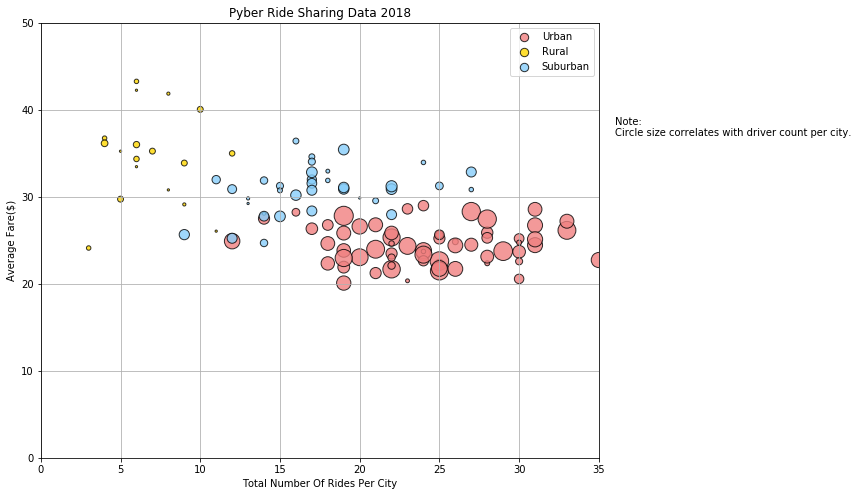

In [11]:
# Create scatterplots for each city type dataframes
# Scatter plot for urban
fig = plt.figure(figsize=(10,8))
plt.grid(True)
sct_urban = plt.scatter(x=rides_city_urban,y=avgfare_urban,marker="o",
                        color="lightcoral",s=10*drivers_urban,edgecolor='black', linewidths=1,alpha=0.8,label="Urban")
# Scatter plot for rural
sct_rural = plt.scatter(x=rides_city_rural,y=avgfare_rural,marker="o",
                        color="gold",s=10*drivers_rural,edgecolor='black',linewidths=1,alpha=0.8,label="Rural")
# Scatter plot for Suburban
sct_sub = plt.scatter(x=rides_city_sub,y=avgfare_sub,marker="o",
                      color="lightskyblue",s=10*drivers_sub,edgecolor='black',linewidths=1,alpha=0.8,label="Suburban")

# Set the legends then set equal sizes for legend pts
lgnd = plt.legend(handles=[sct_urban,sct_rural,sct_sub],loc="best")
lgnd.legendHandles[0]._sizes = [70]
lgnd.legendHandles[1]._sizes = [70]
lgnd.legendHandles[2]._sizes = [70]

# Set texts and positions on the chart
plt.text(36,37,'Note:\nCircle size correlates with driver count per city.',fontsize=10)


# Set x and y axis
plt.xlim(0,35)
plt.ylim(0,50)

# axis labels and title
plt.title("Pyber Ride Sharing Data 2018")
plt.xlabel("Total Number Of Rides Per City")
plt.ylabel("Average Fare($)")
plt.savefig("mypyber.png",bbox_inches='tight')

plt.show()


## Total Fares by City Type

In [12]:
# Pie charts
# Total fares for all the city types combined
total_fare = round(ride_df["fare"].sum(),2)
# Total fares for Urban
grouped_type = merge_df.groupby("type")
total_fare_type = grouped_type["fare"].sum()
# % total fares for each city type
percent_fare_type = [(x/total_fare)*100 for x in total_fare_type]
percent_fare_type

[6.811492974983412, 30.463872062732218, 62.72463496228453]

Text(0.5, 1.0, '% Of Total Fares Per City Type')

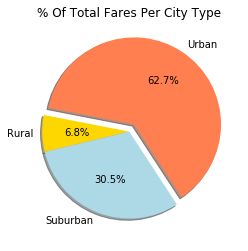

In [13]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# Values per section of the pie chart
percent_fare_type

# Colors per section of the pie chart
colors = ["gold", "lightblue", "Coral"]

# Set matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.1]
# Create the pie chart and automatically set to find the percentages each part of the pie chart
plt.pie(percent_fare_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=169)
plt.title("% Of Total Fares Per City Type")

## Total Rides by City Type

In [14]:
# % of total rides by city type
# Total rides for all cities combined
total_rides = ride_df["ride_id"].count()

# Groupby city type
total_rides_type = grouped_type["ride_id"].count()
total_rides_type

# % total rides per city type
percent_rides_type = [(x/total_rides)*100 for x in total_rides_type]
percent_rides_type

[5.263157894736842, 26.31578947368421, 68.42105263157895]

(-1.1052772830989732,
 1.1863127973827317,
 -1.1127278884131324,
 1.191025342591955)

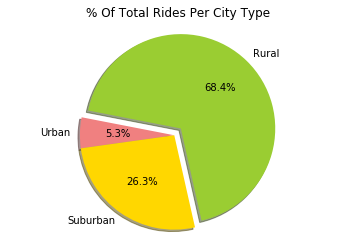

In [15]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# Value per section of the pie chart
percent_rides_type

# Colors per section of the pie chart
colors = ["lightcoral", "gold", "yellowgreen"]

# Set matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.1]
# Create the pie chart and automatically set to find the percentages of each part of the pie chart
plt.pie(percent_rides_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=169)
plt.title("% Of Total Rides Per City Type")
# Set the matplotlib to show a pie chart with equal axes
plt.axis("equal")

## Total Drivers by City Type

In [16]:
# % of total drivers per City Type
# Total drivers for all cities combined
total_drivers = city_df["driver_count"].sum()

# Total drivers for urban
# Groupby city type and city
grouped_city_type = city_df.groupby("type")
total_drivers_type = grouped_city_type["driver_count"].sum()

# % Total drivers per city type
percent_drivers_type = [(x/total_drivers)*100 for x in total_drivers_type]
percent_drivers_type

[2.6236125126135215, 16.481668348469558, 80.89471913891691]

(-1.1107992489998582, 1.231274009892694, -1.054002478011723, 1.157753047004217)

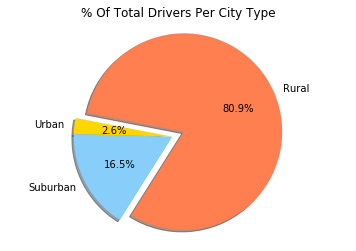

In [17]:
# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# Values per section of the pie chart
percent_drivers_type

# Colors per section of the pie chart
colors = ["gold", "lightskyblue", "coral"]

# Set matplotlib to seperate the "Python" section from the others
explode = [0, 0, 0.13]
# Create the pie chart and automatically set to find the percentages of each part of the pie chart
plt.pie(percent_drivers_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=169)
plt.title("% Of Total Drivers Per City Type")
# Set matplotlib to show a pie chart with equal axes
plt.axis("equal")